In [8]:
#!/usr/bin/python
#dbr 01/22/25
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

import seaborn as sns
sns.set_style("ticks")

#for mem
import statsmodels.api as sm
import statsmodels.formula.api as smf


In [2]:
#read in dfs
dfall=pd.read_csv('data/wideout.csv')#,index=False)
dfpre=pd.read_csv('data/wideout-pre1yr.csv')#,index=False)
dfpost=pd.read_csv('data/wideout-post1yr.csv')#,index=False)


In [3]:
#models, take plist which are different lengths

def onephase(t,plist):
    y0,th = plist
    y = y0*np.exp(-th*t)
    return y

def twophase(t,plist):
    y01,th1,th2,tchg = plist
    y02 = y01*np.exp((-th1+th2)*tchg)
    y = y01*np.exp(-th1*t)+y02*np.exp(-th2*t)
    return y 

In [4]:
#get all rates

poprates=pd.DataFrame()

for mname in ['splitV<1','splitV>1','splitI<1','splitD<1','splitI>1','splitD>1','splitS<1','splitS>1']:
    popparamz=pd.read_csv('monolix/'+mname+'/populationParameters.txt')    
    poprates=poprates.append(popparamz[popparamz['parameter']=='thV1_pop'])
    if mname == 'splitV<1':
        poprates=poprates.append(popparamz[popparamz['parameter']=='thV2_pop'])
    
poprates['param_name']=['RNA<1(1)','RNA<1(2)','RNA>1','Intact<1','Defective<1',
                        'Intact>1','Defective>1','CD4<1','CD4>1']

poprates['cz']=czl=['tab:purple','tab:purple','tab:purple',
                     'tab:orange','tab:blue','tab:orange','tab:blue',
                     'tab:green','tab:green']

poprates

/var/folders/yk/0drxrmsj07l2thjtfhfyxcxh0000gn/T/ipykernel_98416/712685934.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  poprates=poprates.append(popparamz[popparamz['parameter']=='thV1_pop'])
/var/folders/yk/0drxrmsj07l2thjtfhfyxcxh0000gn/T/ipykernel_98416/712685934.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  poprates=poprates.append(popparamz[popparamz['parameter']=='thV2_pop'])
/var/folders/yk/0drxrmsj07l2thjtfhfyxcxh0000gn/T/ipykernel_98416/712685934.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  poprates=poprates.append(popparamz[popparamz['parameter']=='thV1_pop'])
/var/folders/yk/0drxrmsj07l2thjtfhfyxcxh0000gn/T/ipykernel_98416/712685934.py:7: FutureWarning: The frame.append method is deprecated an

,parameter,value,se_sa,rse_sa,param_name,cz
1,thV1_pop,3.112270,0.409401,13.154402,RNA<1(1),tab:purple
2,thV2_pop,0.250000,0.050470,20.187898,RNA<1(2),tab:purple
1,thV1_pop,0.003108,0.004768,153.412763,RNA>1,tab:purple
1,thV1_pop,0.260999,0.046917,17.975907,Intact<1,tab:orange
1,thV1_pop,0.080804,0.024194,29.941259,Defective<1,tab:blue
1,thV1_pop,0.030983,0.017848,57.604349,Intact>1,tab:orange
1,thV1_pop,-0.006817,0.003060,44.881620,Defective>1,tab:blue
1,thV1_pop,-0.046252,0.006858,14.826688,CD4<1,tab:green
1,thV1_pop,0.007477,0.001103,14.753479,CD4>1,tab:green


In [5]:
poprates.to_csv('TableS1-poprates.csv')

0.2227143146680493 , 0.3000838093929716 , 0.1770628557832377
2.7725890621609746 , 4.587969835444437 , 1.98654669415405
223.03892125226108 , -111.13658660536454 , 55.66384721261844
2.6557430199597496 , 4.10044304179213 , 1.9638308447652653
8.578134834778606 , 20.762694596935834 , 5.4057674076471205
22.37175953243192 , -173.36368126413996 , 10.507883538830415
-101.67302348285824 , -54.090609695610006 , -845.0200189453436
-14.986368473609128 , -11.611911281256063 , -21.125505437194704
92.7057395896513 , 130.41866910762815 , 71.9112842247096


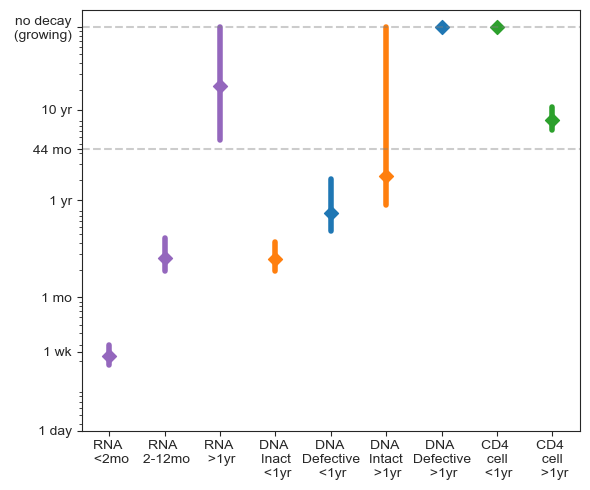

In [6]:
# plot population estimates for expansions

plt.figure(figsize=(6,5))

czl=['tab:purple','tab:purple','tab:purple','tab:orange','tab:blue','tab:orange','tab:blue','tab:green','tab:green']

for i in range(len(poprates)):
    tdf = poprates.iloc[i]
    
    #get mean upper and lower CI
    meanhl=np.log(2)/tdf['value']
    uhl=np.log(2)/(tdf['value']+1.96*tdf['se_sa'])
    lhl=np.log(2)/(tdf['value']-1.96*tdf['se_sa'])
    
    print(meanhl,',',lhl,',',uhl) #half lives

    #change these for plotting
    if meanhl<0:
        meanhl=1000
    if lhl<0:
        lhl=1000
    if uhl<0:
        uhl=1000

    plt.scatter(i,meanhl,c=czl[i],s=50,marker='D')
    plt.plot([i,i],[lhl,uhl],color=czl[i],lw=4)

plt.semilogy()
plt.yticks([1/30,1/4,1,12,44,120,1000],['1 day','1 wk','1 mo', '1 yr','44 mo', '10 yr', 'no decay\n (growing)'])
#plt.ylabel('Half-life')
plt.axhline(1000,ls='--',color='gray',alpha=0.4)
plt.axhline(44,ls='--',color='gray',alpha=0.4)

plt.xticks(range(9),['RNA \n <2mo','RNA \n 2-12mo', 'RNA \n >1yr',
                     'DNA \n Inact \n <1yr','DNA \n Defective \n <1yr',
                     'DNA \n Intact \n >1yr','DNA \n Defective \n >1yr',
                    'CD4 \n cell \n <1yr','CD4 \n cell \n >1yr'], rotation=0)
plt.xlim([-0.5,8.5])
#plt.grid()
#plt.xlabel('Decay rate in interval relative to ART')
plt.tight_layout()
plt.savefig('figures/pop-hls.pdf',dpi=600)



In [9]:
#do statistics on rates

I1 = poprates.iloc[3]
D1 = poprates.iloc[4]

I2 = poprates.iloc[5]
D2 = poprates.iloc[6]

print(I1['value'],D1['value'])
print(I2['value'],D2['value'])


z11 = (I1['value']-D1['value'])/I1['se_sa']
z12 = (I1['value']-D1['value'])/D1['se_sa']

z21 = (I2['value']-D2['value'])/I2['se_sa']
z22 = (I2['value']-D2['value'])/D2['se_sa']

#really we want to check the hypothesis that the mean intact could have come from the defective, so z12 and z22

pvals=[]
for z in [z11,z12,z21,z22]:

    pvals.append(1 - st.norm.cdf(abs(z))) #1 sided pvalue (otherwise x2)

print(pvals)

0.260999341935746 0.0808039502654699
0.0309831320846759 -0.0068174148541654
[6.133522791162971e-05, 4.7406523151494184e-14, 0.01708928244311836, 0.0]


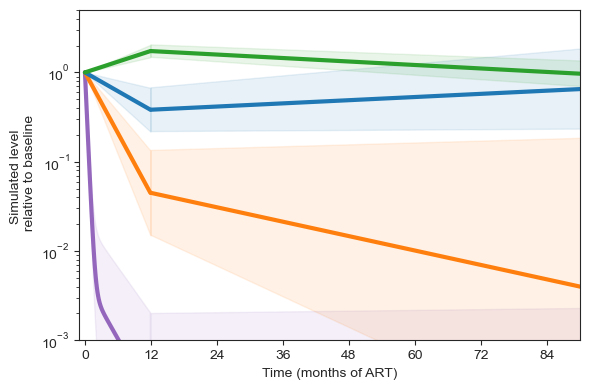

In [17]:
#simulate all decay dynamics relative to initial value

plt.figure(figsize=(6,4))
czl=['tab:purple','tab:purple','tab:purple','tab:orange','tab:blue','tab:orange','tab:blue','tab:green','tab:green']

simt1=np.linspace(0,11.9,100)
simt2=np.linspace(12,120,1000)

#VL<1 sim
cz='tab:purple'
popparamz=pd.read_csv('monolix/splitV<1/populationParameters.txt')    

plist1 = popparamz['value'][:4]
plist1u = popparamz['value'][:4]+popparamz['se_sa'][:4]
plist1l = popparamz['value'][:4]-popparamz['se_sa'][:4]

simV1 = twophase(simt1,plist1)/plist1[0]
simV1u = twophase(simt1,plist1u)/plist1u[0]
simV1l = twophase(simt1,plist1l)/plist1l[0]

plt.plot(simt1-simt1[0],simV1,color=cz,lw=3)#,label=dd)
plt.fill_between(simt1-simt1[0],simV1l,simV1u,color=cz,alpha=0.1)

#VL>1 sim
popparamz=pd.read_csv('monolix/splitV>1/populationParameters.txt')    
th2 = popparamz['value'][1]
th2u = th2+popparamz['se_sa'][1]
th2l = th2-popparamz['se_sa'][1]

simV2 = onephase(simt2-simt2[0],(simV1[-1],th2))/simV1[0]
simV2u = onephase(simt2-simt2[0],(simV1u[-1],th2u))/simV1u[0]
simV2l = onephase(simt2-simt2[0],(simV1l[-1],th2l))/simV1l[0]

plt.plot(simt2,simV2,color=cz,lw=3,label='RNA')
plt.fill_between(simt2,simV2l,simV2u,color=cz,alpha=0.1)

##Intact<1
for io in range(3):
    cz=['tab:orange','tab:blue','tab:green'][io]

    d=['I','D','S'][io]
    dname=['DNA \n Intact','DNA \n Defective','CD4 cells'][io]
    popparamz=pd.read_csv('monolix/split'+d+'<1/populationParameters.txt')    
    
    plist1 = list(popparamz['value'][:2])
    plist1u = list(popparamz['value'][:2]+1.96*popparamz['se_sa'][:2])
    plist1l = list(popparamz['value'][:2]-1.96*popparamz['se_sa'][:2])

    simV1 = onephase(simt1,plist1)/plist1[0]
    simV1u = onephase(simt1,plist1u)/plist1u[0]
    simV1l = onephase(simt1,plist1l)/plist1l[0]

    plt.plot(simt1-simt1[0],simV1,color=cz,lw=3)#,label=dd)
    plt.fill_between(simt1-simt1[0],simV1l,simV1u,color=cz,alpha=0.1)

    #>1 sim
    popparamz=pd.read_csv('monolix/split'+d+'>1/populationParameters.txt')    
    th2 = popparamz['value'][1]
    th2u = th2+1.96*popparamz['se_sa'][1]
    th2l = th2-1.96*popparamz['se_sa'][1]

    simV2 = onephase(simt2-simt2[0],(simV1[-1],th2))/simV1[0]
    simV2u = onephase(simt2-simt2[0],(simV1u[-1],th2u))/simV1u[0]
    simV2l = onephase(simt2-simt2[0],(simV1l[-1],th2l))/simV1l[0]

    plt.plot(simt2,simV2,color=cz,lw=3,label=dname)
    plt.fill_between(simt2,simV2l,simV2u,color=cz,alpha=0.1)

plt.xticks(np.arange(0,121,12))
plt.semilogy()
plt.ylabel('Simulated level \n relative to baseline')
plt.xlabel('Time (months of ART)')
plt.xlim([-1,90])
plt.ylim([1e-3,5])
plt.tight_layout()    
plt.savefig('figures/pop-rate-sims.pdf',dpi=600)

#plt.legend(ncol=2,loc=0)


In [18]:
#output rates for cytokine/TCR comparison
#go through and get individual estimates

#for VL, needs two slopes
pdf=pd.read_csv('monolix/splitV<1/IndividualParameters/estimatedIndividualParameters.txt')
pdf = pdf[['id','thV1_mode', 'thV2_mode']]
pdf=pdf.rename(columns={'thV1_mode':'RNA<1(1)','thV2_mode':'RNA<1(2)' })

#rest of types
thnames = ['RNA>1','Intact<1','Defective<1','Intact>1','Defective>1','CD4<1','CD4>1']
for im, mname in enumerate(['splitV>1','splitI<1','splitD<1','splitI>1','splitD>1','splitS<1','splitS>1']):
    pdfi = pd.read_csv('monolix/'+mname+'/IndividualParameters/estimatedIndividualParameters.txt')
    pdfi = pdfi[['id','thV1_mode']]
    pdfi = pdfi.rename(columns={'thV1_mode': thnames[im] })
    pdf = pd.merge(pdf,pdfi,on='id',how='outer')

#individual rates
pdf.to_csv('data/rates_monolix_indiv.csv')